In [2]:
import pandas as pd
import mne as mne
import os 
import time
import numpy as np
import matplotlib.pyplot as plt
import joblib
import constants
from IPython.utils import io
import time
import sys
import yasa
from scipy.signal import welch

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

import matplotlib.patches as mpatches

#Import my modules
import format_eeg_data
import constants
import eeg_stat_ts
import run_expts

#TS Fresh Parameter Settings
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh.feature_extraction import MinimalFCParameters
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.feature_extraction import extract_features

# Set display options to show all rows and columns
pd.set_option('display.max_rows', 50)  # Show rows
pd.set_option('display.max_columns', 160)  # Show columns

/user/home/ko20929/.conda/envs/sktime_latest/lib/python3.11/site-packages/antropy/fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))


In [3]:
core_path = '/user/home/ko20929/work/RBD_using_custom_package/Execute New Experiments/Baseline_Extensions/Combine_Max_Freq_Power_Band/'
file_name = 'All_results_bpw_plus_max_freq_efficient_TS_Fresh.pkl'
file_name_2 = 'All_results_bpw_plus_max_freq_minimal_TS_Fresh.pkl'
loaded_dict = joblib.load(core_path + file_name_2)
loaded_dict.keys()

results_dict = loaded_dict

In [9]:
#Loading Results
expt_1_results = joblib.load('Results/expt_1_TS_fresh_efficient_feats_results.pkl')
expt_1_combined_results = joblib.load('Results/expt_1_combined_TS_fresh_efficient_feats_results.pkl')
expt_2_results = joblib.load('Results/expt_2_TS_fresh_efficient_feats_results.pkl')
expt_3_results = joblib.load('Results/expt_3_TS_fresh_efficient_feats_results.pkl')
expt_4_results = joblib.load('Results/expt_4_TS_fresh_efficient_feats_results.pkl')

In [36]:
expt_1_combined_results.keys()

dict_keys(['N1'])

In [32]:
results_dict = {1 : expt_1_results , 1_1 : expt_1_combined_results ,  2: expt_2_results , 3: expt_3_results , 4: expt_4_results}

In [20]:
mean_df

,random_state,Prefrontal_RF_acc,Prefrontal_RF_std,Frontal_RF_acc,Frontal_RF_std,Left Frontal_RF_acc,Left Frontal_RF_std,Right Frontal_RF_acc,Right Frontal_RF_std,Central_RF_acc,Central_RF_std,Left Central_RF_acc,Left Central_RF_std,Right Central_RF_acc,Right Central_RF_std,Left Temporal_RF_acc,Left Temporal_RF_std,Right Temporal_RF_acc,Right Temporal_RF_std,Parietal_RF_acc,Parietal_RF_std,Left Parietal_RF_acc,Left Parietal_RF_std,Right Parietal_RF_acc,Right Parietal_RF_std,Occipital_RF_acc,Occipital_RF_std
0,1.5,0.434066,0.137365,0.42033,0.148438,0.434615,0.123126,0.419231,0.128633,0.391209,0.105555,0.398352,0.138226,0.413187,0.143239,0.440659,0.110402,0.455495,0.16055,0.447802,0.118853,0.448901,0.158092,0.41978,0.157812,0.376374,0.114684


In [27]:
#Defining the dataframe dictionary to be filled up

expt_info = [ '1. PD vs HC', '2. (PD , PD+RBD) vs HC', '3. (PD + PD&RBD) vs HC vs RBD  multiclass', 
             '4. PD vs PD+RBD vs RBD vs HC  multiclass' ]

df_cols = ['Expt_type num', 'Classifier Name', 'Classifier', 'EEG Type',
       'Brain Region', 'Accuracy', 'Accuracy_std']

df_dict = {}
for col in df_cols:
    df_dict[col] = []

regions = constants.regions

data_types = ['Wake', 'N1', 'N2', 'N3', 'REM']

In [28]:
for expt_num in [1, 2,3,4]:
    for dtype in ['Wake', 'N1', 'N2', 'N3', 'REM']:
        raw_results_df = results_dict[expt_num][dtype]['regional']
        results_df =run_expts.generate_subset_acc_std(raw_results_df,  return_df = True)
        mean_df = pd.DataFrame(results_df.mean(axis = 0) ).T

        for region in regions:
            #For each region take mean accuracy and std
            region_cols = [col for col in mean_df.columns if region in col]
            acc_col = [col for col in region_cols if 'acc' in col]
            std_col = [col for col in region_cols if 'std' in col]
            region_acc = mean_df[acc_col].values[0][0]
            region_acc_std = mean_df[std_col].values[0][0]

            #Now fill up the dataframe

            #Now fill up the dataframe
            df_dict['Expt_type num'].append(expt_num)
            
            df_dict['Classifier Name'].append('Random Forest')
            df_dict['Classifier'].append('RF')
            df_dict['EEG Type'].append(dtype)
            df_dict['Brain Region'].append(region)
            df_dict['Accuracy'].append(region_acc)
            df_dict['Accuracy_std'].append(region_acc_std)
            
full_results_df = pd.DataFrame(df_dict)  

In [1]:
#This makes the previous code work
results_df = full_results_df.copy()

NameError: name 'full_results_df' is not defined

<Figure size 640x480 with 0 Axes>

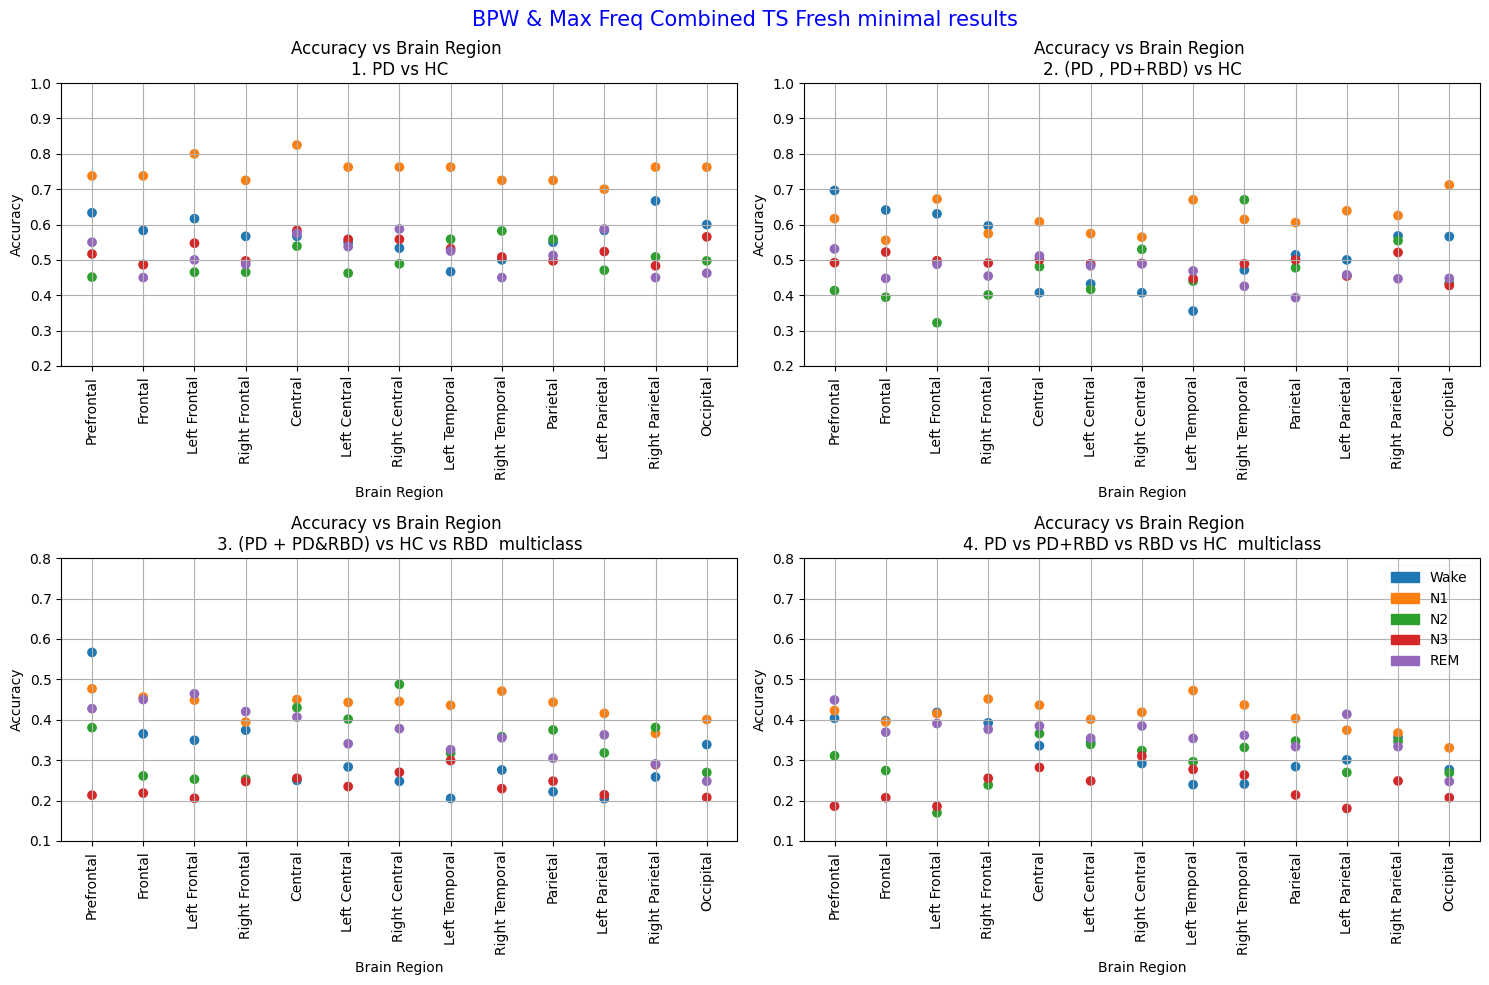

<Figure size 640x480 with 0 Axes>

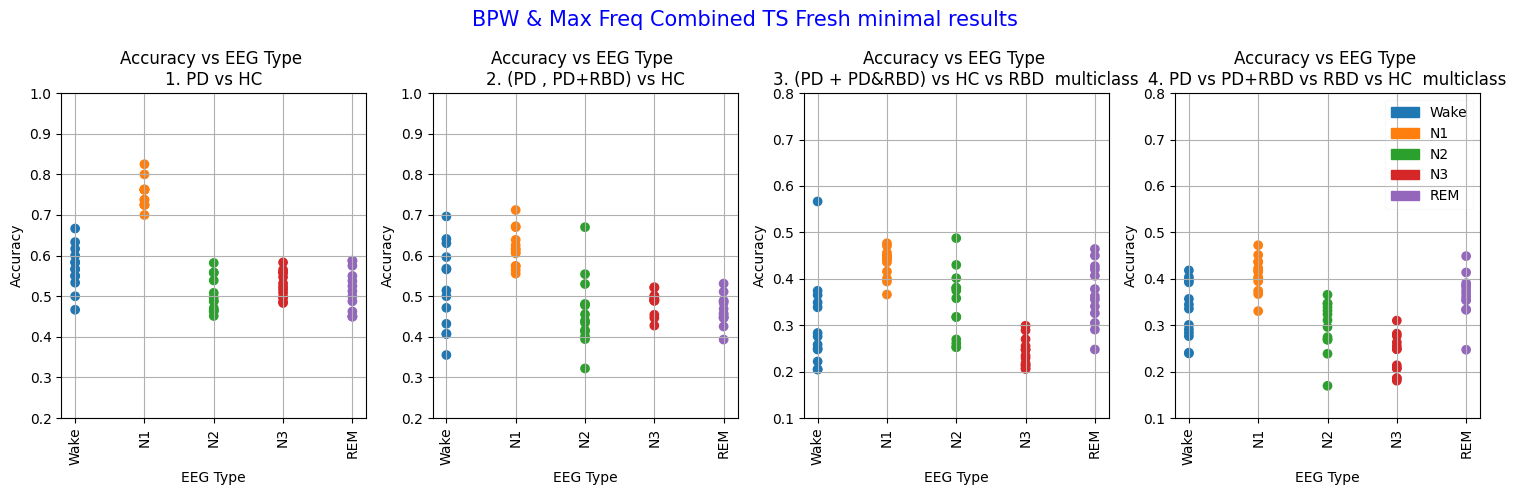

In [31]:
fig = plt.figure()
fig = plt.figure(figsize=(15,10),dpi=100)

for i in [1,2,3,4]:
    expt_num = i
    expt_results = results_df[results_df['Expt_type num'] == expt_num].copy()
    expt_results.sort_values(by=['Brain Region','Accuracy'], ascending = False)
    
    ax = fig.add_subplot(2,2,i)
    
    plt.title('Accuracy vs Brain Region \n' + expt_info[expt_num-1])
    
    #Define colours for the different data types
    colors = {'Wake':'tab:blue', 'N1':'tab:orange', 'N2':'tab:green', 'N3':'tab:red', 'REM':'tab:purple'}
    plt.scatter(expt_results['Brain Region'].values, expt_results['Accuracy'].values,
                    c = expt_results['EEG Type'].map(colors))

   
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.xlabel('Brain Region')
    plt.ylabel('Accuracy')
    if i in [1,2]:
        plt.ylim((0.2,1))
    else:
        plt.ylim((0.1,0.8))
    
    # plt.ylim((0,1.05))
    plt.grid()

    plt.tight_layout()

#Custom Legend, because standard legend wouldn't work for some reason
patches = []
for key, val in colors.items():
    patches.append(mpatches.Patch(color= val, label=key) )

plt.legend(handles=patches, framealpha = 0.1)
plt.suptitle('BPW & Max Freq Combined TS Fresh minimal results', size = 15, color = 'blue')
plt.tight_layout()

plt.savefig('bpw_max_freq_combined_minimal_feats_regional.png', dpi=200) 

fig = plt.figure()
fig = plt.figure(figsize=(15,5),dpi=100)

for i in [1,2,3,4]:
    expt_num = i
    expt_results = results_df[results_df['Expt_type num'] == expt_num].copy()
    expt_results.sort_values(by=['Brain Region','Accuracy'], ascending = False)
    
    ax = fig.add_subplot(1,4,i)
    
    plt.title('Accuracy vs EEG Type \n' + expt_info[expt_num-1])
    
    #Define colours for the different data types
    colors = {'Wake':'tab:blue', 'N1':'tab:orange', 'N2':'tab:green', 'N3':'tab:red', 'REM':'tab:purple'}
    plt.scatter(expt_results['EEG Type'].values, expt_results['Accuracy'].values,
                    c = expt_results['EEG Type'].map(colors))

   
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.xlabel('EEG Type')
    plt.ylabel('Accuracy')
    if i in [1,2]:
        plt.ylim((0.2,1))
    else:
        plt.ylim((0.1,0.8))
        
    plt.grid()

    plt.tight_layout()

#Custom Legend, because standard legend wouldn't work for some reason
patches = []
for key, val in colors.items():
    patches.append(mpatches.Patch(color= val, label=key) )

plt.legend(handles=patches, framealpha = 0.1)
plt.suptitle('BPW & Max Freq Combined TS Fresh minimal results', size = 15, color = 'blue')
plt.tight_layout()
plt.savefig('bpw_max_freq_combined_minimal_feats_regional_data_type.png', dpi=200) 